<a href="https://colab.research.google.com/github/shuvangiadhikari/Major-Project/blob/main/Ranjana_Lipi_Recognition_using_CapsNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AlexNet

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Extracting the data
!unzip "/content/drive/MyDrive/Major/RanjanaDataset.zip" -d RanjanaDataset

In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential, Model
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras import layers


# Define the model using AlexNet architecture
def model(num_classes):
    model = Sequential()

     # 1st Convolutional Layer
    model.add(Conv2D(filters=32, input_shape=(64,64,1), kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))

    # 5th Convolutional Layer
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Passing it to a Fully Connected layer
    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # 2nd Fully Connected Layer
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import os

# Define constants
DATASET_PATH = '/content/RanjanaDataset/Ranjana/Training'
MODEL_PATH = '.'
BATCH_SIZE = 128
EPOCHS = 20
TARGET_WIDTH = 64
TARGET_HEIGHT = 64
TARGET_DEPTH = 1

In [ ]:
# Set up the data generator to flow data from disk
print("[INFO] Setting up Data Generator...")
data_gen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = data_gen.flow_from_directory(
    DATASET_PATH,
    subset='training',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE,
    color_mode='grayscale'  # Add this line to convert images to grayscale
)

val_generator = data_gen.flow_from_directory(
    DATASET_PATH,
    subset='validation',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE,
    color_mode='grayscale'  # Add this line to convert images to grayscale
)

[INFO] Setting up Data Generator...
Found 83328 images belonging to 62 classes.
Found 20832 images belonging to 62 classes.


In [ ]:
# Build model
print("[INFO] Compiling model...")
alexnet = model(train_generator.num_classes)

# Compile the model
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

[INFO] Compiling model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
alexnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 62)                  │          15,934 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,444,606 (5.51 MB)

 Trainable params: 1,444,606 (5.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set the learning rate decay
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2, min_lr=0.001)

In [ ]:
# Train
H = alexnet.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps = val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS, verbose=1, callbacks=[reduce_lr])

# Save
# alexnet.save(MODEL_PATH + os.path.sep + "trained_model")

[INFO] Training network ...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


651/651 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.3544 - loss: 2.4949 - val_accuracy: 0.9566 - val_loss: 0.1471 - learning_rate: 0.0010
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.2144 - learning_rate: 0.0010
Epoch 3/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 71s 66ms/step - accuracy: 0.8972 - loss: 0.3274 - val_accuracy: 0.9737 - val_loss: 0.0919 - learning_rate: 0.0010
Epoch 4/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9792 - val_loss: 0.0680 - learning_rate: 0.0010
Epoch 5/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.9447 - loss: 0.1771 - val_accuracy: 0.9730 - val_loss: 0.0972 - learning_rate: 0.0010
Epoch 6/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 67us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9896 - val_loss: 0.0358 - learning_rate: 0.0010
Epoch 7/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.9588 - loss: 0.1277 - val_accuracy: 0.9778 - val_loss: 0.0827 - learning_rate: 0.0010
Epoch 8/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=./trained_model.

In [ ]:
alexnet.save(MODEL_PATH + os.path.sep + "trained_model.h5")

In [ ]:
model = keras.models.load_model(MODEL_PATH + os.path.sep + "trained_model.h5" )

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the model
model = keras.models.load_model(MODEL_PATH + os.path.sep + "trained_model.h5")

# Load and preprocess the image
def preprocess_image(image_path, target_size=(64, 64)):
    # Load the image
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    # Convert the image to an array
    img_array = img_to_array(img)
    # Scale pixel values to [0, 1]
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Specify the path to the image you want to predict
image_path = '/content/RanjanaDataset/Ranjana/Testing/15/15 (1).png'  # Update this with the actual image path
processed_image = preprocess_image(image_path)

# Make a prediction
predictions = model.predict(processed_image)

# Interpret the prediction results
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {predicted_class}")

""" The model works but the data generation is not in sequence, so the prediction is right
for the sequence the folders are arranged as """

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Predicted class: [6]


# CapsuleNet

**For MNIST only**

In [ ]:
# import resources
import numpy as np
import torch

# random seed (for reproducibility)
seed = 1
# set random seed for numpy
np.random.seed(seed)
# set random seed for pytorch
torch.manual_seed(seed)

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to Tensors
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                            download=True, transform=transform)

test_data = datasets.MNIST(root='data', train=False,
                           download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          num_workers=num_workers)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:01<00:00, 5497057.19it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 154068.05it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1294313.32it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3496151.36it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
print(test_loader)

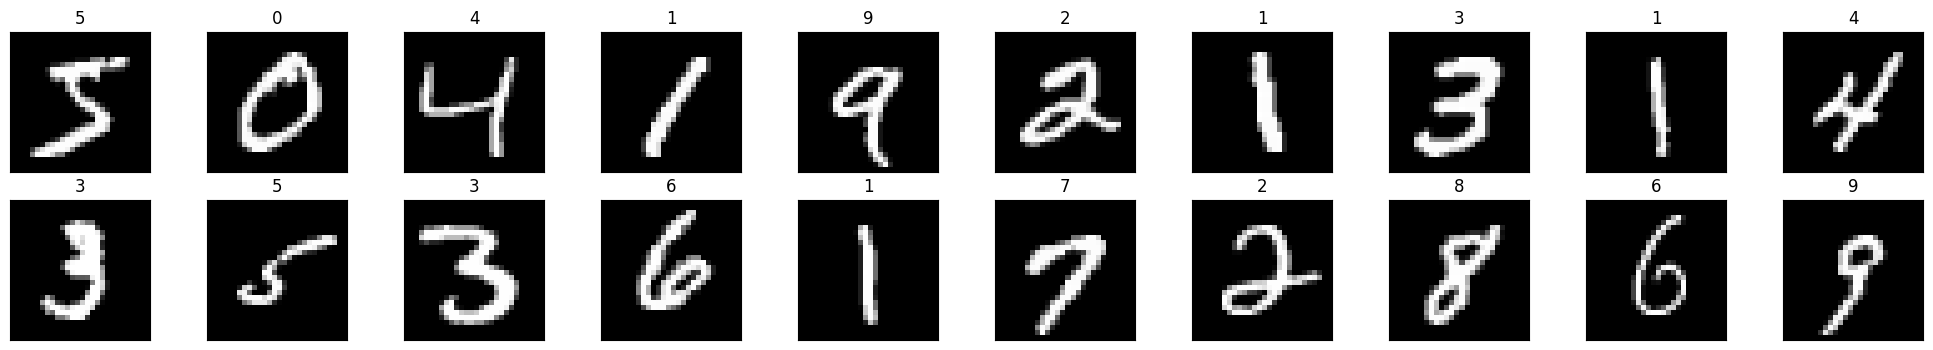

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [ ]:
from torch import nn
class ConvLayer(nn.Module):

    def __init__(self, in_channels=1, out_channels=256):
        '''Constructs the ConvLayer with a specified input and output size.
           param in_channels: input depth of an image, default value = 1
           param out_channels: output depth of the convolutional layer, default value = 256
           '''
        super(ConvLayer, self).__init__()

        # defining a convolutional layer of the specified size
        self.conv = nn.Conv2d(in_channels, out_channels,
                              kernel_size=9, stride=1, padding=0)

    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input to the layer; an input image
           return: a relu-activated, convolutional layer
           '''
        # applying a ReLu activation to the outputs of the conv layer
        features = F.relu(self.conv(x)) # will have dimensions (batch_size, 20, 20, 256)
        return features

In [ ]:
class PrimaryCaps(nn.Module):

    def __init__(self, num_capsules=8, in_channels=256, out_channels=32):
        '''Constructs a list of convolutional layers to be used in
           creating capsule output vectors.
           param num_capsules: number of capsules to create
           param in_channels: input depth of features, default value = 256
           param out_channels: output depth of the convolutional layers, default value = 32
           '''
        super(PrimaryCaps, self).__init__()

        # creating a list of convolutional layers for each capsule I want to create
        # all capsules have a conv layer with the same parameters
        self.capsules = nn.ModuleList([
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                      kernel_size=9, stride=2, padding=0)
            for _ in range(num_capsules)])

    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input; features from a convolutional layer
           return: a set of normalized, capsule output vectors
           '''
        # get batch size of inputs
        batch_size = x.size(0)
        # reshape convolutional layer outputs to be (batch_size, vector_dim=1152, 1)
        u = [capsule(x).view(batch_size, 32 * 6 * 6, 1) for capsule in self.capsules]
        # stack up output vectors, u, one for each capsule
        u = torch.cat(u, dim=-1)
        # squashing the stack of vectors
        u_squash = self.squash(u)
        return u_squash

    def squash(self, input_tensor):
        '''Squashes an input Tensor so it has a magnitude between 0-1.
           param input_tensor: a stack of capsule inputs, s_j
           return: a stack of normalized, capsule output vectors, v_j
           '''
        squared_norm = (input_tensor ** 2).sum(dim=-1, keepdim=True)
        scale = squared_norm / (1 + squared_norm) # normalization coeff
        output_tensor = scale * input_tensor / torch.sqrt(squared_norm)
        return output_tensor


In [ ]:
#import helpers # to get transpose softmax function
import torch.nn.functional as F

# dynamic routing
def dynamic_routing(b_ij, u_hat, squash, routing_iterations=3):
    '''Performs dynamic routing between two capsule layers.
       param b_ij: initial log probabilities that capsule i should be coupled to capsule j
       param u_hat: input, weighted capsule vectors, W u
       param squash: given, normalizing squash function
       param routing_iterations: number of times to update coupling coefficients
       return: v_j, output capsule vectors
       '''
    # update b_ij, c_ij for number of routing iterations
    for iteration in range(routing_iterations):
        # softmax calculation of coupling coefficients, c_ij
        c_ij = F.softmax(b_ij, dim=2)

        # calculating total capsule inputs, s_j = sum(c_ij*u_hat)
        s_j = (c_ij * u_hat).sum(dim=2, keepdim=True)

        # squashing to get a normalized vector output, v_j
        v_j = squash(s_j)

        # if not on the last iteration, calculate agreement and new b_ij
        if iteration < routing_iterations - 1:
            # agreement
            a_ij = (u_hat * v_j).sum(dim=-1, keepdim=True)

            # new b_ij
            b_ij = b_ij + a_ij

    return v_j # return latest v_j

In [ ]:
# it will also be relevant, in this model, to see if I can train on gpu
TRAIN_ON_GPU = torch.cuda.is_available()

if(TRAIN_ON_GPU):
    print('Training on GPU!')
else:
    print('Only CPU available')

Only CPU available


In [ ]:
class DigitCaps(nn.Module):

    def __init__(self, num_capsules=10, previous_layer_nodes=32*6*6,
                 in_channels=8, out_channels=16):
        '''Constructs an initial weight matrix, W, and sets class variables.
           param num_capsules: number of capsules to create
           param previous_layer_nodes: dimension of input capsule vector, default value = 1152
           param in_channels: number of capsules in previous layer, default value = 8
           param out_channels: dimensions of output capsule vector, default value = 16
           '''
        super(DigitCaps, self).__init__()

        # setting class variables
        self.num_capsules = num_capsules
        self.previous_layer_nodes = previous_layer_nodes # vector input (dim=1152)
        self.in_channels = in_channels # previous layer's number of capsules

        # starting out with a randomly initialized weight matrix, W
        # these will be the weights connecting the PrimaryCaps and DigitCaps layers
        self.W = nn.Parameter(torch.randn(num_capsules, previous_layer_nodes,
                                          in_channels, out_channels))

    def forward(self, u):
        '''Defines the feedforward behavior.
           param u: the input; vectors from the previous PrimaryCaps layer
           return: a set of normalized, capsule output vectors
           '''

        # adding batch_size dims and stacking all u vectors
        u = u[None, :, :, None, :]
        # 4D weight matrix
        W = self.W[:, None, :, :, :]

        # calculating u_hat = W*u
        u_hat = torch.matmul(u, W)

        # getting the correct size of b_ij
        # setting them all to 0, initially
        b_ij = torch.zeros(*u_hat.size())

        # moving b_ij to GPU, if available
        if TRAIN_ON_GPU:
            b_ij = b_ij.cuda()

        # update coupling coefficients and calculate v_j
        v_j = dynamic_routing(b_ij, u_hat, self.squash, routing_iterations=3)

        return v_j # return final vector outputs


    def squash(self, input_tensor):
        '''Squashes an input Tensor so it has a magnitude between 0-1.
           param input_tensor: a stack of capsule inputs, s_j
           return: a stack of normalized, capsule output vectors, v_j
           '''
        # same squash function as before
        squared_norm = (input_tensor ** 2).sum(dim=-1, keepdim=True)
        scale = squared_norm / (1 + squared_norm) # normalization coeff
        output_tensor = scale * input_tensor / torch.sqrt(squared_norm)
        return output_tensor

In [ ]:
class Decoder(nn.Module):

    def __init__(self, input_vector_length=16, input_capsules=10, hidden_dim=512):
        '''Constructs an series of linear layers + activations.
           param input_vector_length: dimension of input capsule vector, default value = 16
           param input_capsules: number of capsules in previous layer, default value = 10
           param hidden_dim: dimensions of hidden layers, default value = 512
           '''
        super(Decoder, self).__init__()

        # calculate input_dim
        input_dim = input_vector_length * input_capsules

        # define linear layers + activations
        self.linear_layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), # first hidden layer
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim, hidden_dim*2), # second, twice as deep
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim*2, 28*28), # can be reshaped into 28*28 image
            nn.Sigmoid() # sigmoid activation to get output pixel values in a range from 0-1
            )

    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input; vectors from the previous DigitCaps layer
           return: two things, reconstructed images and the class scores, y
           '''
        classes = (x ** 2).sum(dim=-1) ** 0.5
        classes = F.softmax(classes, dim=-1)

        # find the capsule with the maximum vector length
        # here, vector length indicates the probability of a class' existence
        _, max_length_indices = classes.max(dim=1)

        # create a sparse class matrix
        sparse_matrix = torch.eye(10) # 10 is the number of classes
        if TRAIN_ON_GPU:
            sparse_matrix = sparse_matrix.cuda()
        # get the class scores from the "correct" capsule
        y = sparse_matrix.index_select(dim=0, index=max_length_indices.data)

        # create reconstructed pixels
        x = x * y[:, :, None]
        # flatten image into a vector shape (batch_size, vector_dim)
        flattened_x = x.contiguous().view(x.size(0), -1)
        # create reconstructed image vectors
        reconstructions = self.linear_layers(flattened_x)

        # return reconstructions and the class scores, y
        return reconstructions, y

In [ ]:
class CapsuleNetwork(nn.Module):

    def __init__(self):
        '''Constructs a complete Capsule Network.'''
        super(CapsuleNetwork, self).__init__()
        self.conv_layer = ConvLayer()
        self.primary_capsules = PrimaryCaps()
        self.digit_capsules = DigitCaps()
        self.decoder = Decoder()

    def forward(self, images):
        '''Defines the feedforward behavior.
           param images: the original MNIST image input data
           return: output of DigitCaps layer, reconstructed images, class scores
           '''
        primary_caps_output = self.primary_capsules(self.conv_layer(images))
        caps_output = self.digit_capsules(primary_caps_output).squeeze().transpose(0,1)
        reconstructions, y = self.decoder(caps_output)
        return caps_output, reconstructions, y


In [ ]:
# instantiate and print net
capsule_net = CapsuleNetwork()

print(capsule_net)

# move model to GPU, if available
if TRAIN_ON_GPU:
    capsule_net = capsule_net.cuda()

CapsuleNetwork(
  (conv_layer): ConvLayer(
    (conv): Conv2d(1, 256, kernel_size=(9, 9), stride=(1, 1))
  )
  (primary_capsules): PrimaryCaps(
    (capsules): ModuleList(
      (0-7): 8 x Conv2d(256, 32, kernel_size=(9, 9), stride=(2, 2))
    )
  )
  (digit_capsules): DigitCaps()
  (decoder): Decoder(
    (linear_layers): Sequential(
      (0): Linear(in_features=160, out_features=512, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=512, out_features=1024, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=1024, out_features=784, bias=True)
      (5): Sigmoid()
    )
  )
)


In [ ]:
class CapsuleLoss(nn.Module):

    def __init__(self):
        '''Constructs a CapsuleLoss module.'''
        super(CapsuleLoss, self).__init__()
        self.reconstruction_loss = nn.MSELoss(reduction='sum') # cumulative loss, equiv to size_average=False

    def forward(self, x, labels, images, reconstructions):
        '''Defines how the loss compares inputs.
           param x: digit capsule outputs
           param labels:
           param images: the original MNIST image input data
           param reconstructions: reconstructed MNIST image data
           return: weighted margin and reconstruction loss, averaged over a batch
           '''
        batch_size = x.size(0)

        ##  calculate the margin loss   ##

        # get magnitude of digit capsule vectors, v_c
        v_c = torch.sqrt((x**2).sum(dim=2, keepdim=True))

        # calculate "correct" and incorrect loss
        left = F.relu(0.9 - v_c).view(batch_size, -1)
        right = F.relu(v_c - 0.1).view(batch_size, -1)

        # sum the losses, with a lambda = 0.5
        margin_loss = labels * left + 0.5 * (1. - labels) * right
        margin_loss = margin_loss.sum()

        ##  calculate the reconstruction loss   ##
        images = images.view(reconstructions.size()[0], -1)
        reconstruction_loss = self.reconstruction_loss(reconstructions, images)

        # return a weighted, summed loss, averaged over a batch size
        return (margin_loss + 0.0005 * reconstruction_loss) / images.size(0)

In [ ]:
import torch.optim as optim

# custom loss
criterion = CapsuleLoss()

# Adam optimizer with default params
optimizer = optim.Adam(capsule_net.parameters())

In [ ]:
def train(capsule_net, criterion, optimizer,
          n_epochs, print_every=300):
    '''Trains a capsule network and prints out training batch loss statistics.
       Saves model parameters if *validation* loss has decreased.
       param capsule_net: trained capsule network
       param criterion: capsule loss function
       param optimizer: optimizer for updating network weights
       param n_epochs: number of epochs to train for
       param print_every: batches to print and save training loss, default = 100
       return: list of recorded training losses
       '''

    # track training loss over time
    losses = []

    # one epoch = one pass over all training data
    for epoch in range(1, n_epochs+1):

        # initialize training loss
        train_loss = 0.0

        capsule_net.train() # set to train mode

        # get batches of training image data and targets
        for batch_i, (images, target) in enumerate(train_loader):

            # reshape and get target class
            target = torch.eye(10).index_select(dim=0, index=target)

            if TRAIN_ON_GPU:
                images, target = images.cuda(), target.cuda()

            # zero out gradients
            optimizer.zero_grad()
            # get model outputs
            caps_output, reconstructions, y = capsule_net(images)
            # calculate loss
            loss = criterion(caps_output, target, images, reconstructions)
            # perform backpropagation and optimization
            loss.backward()
            optimizer.step()

            train_loss += loss.item() # accumulated training loss

            # print and record training stats
            if batch_i != 0 and batch_i % print_every == 0:
                avg_train_loss = train_loss/print_every
                losses.append(avg_train_loss)
                print('Epoch: {} \tTraining Loss: {:.8f}'.format(epoch, avg_train_loss))
                train_loss = 0 # reset accumulated training loss

    return losses

In [ ]:
# training for 3 epochs
n_epochs = 3
losses = train(capsule_net, criterion, optimizer, n_epochs=n_epochs) # Lacks output visualization, bad UI to know if it is stuck or functioning as intended

Epoch: 1 	Training Loss: 0.25191286
Epoch: 1 	Training Loss: 0.09786229
Epoch: 1 	Training Loss: 0.07618292
Epoch: 1 	Training Loss: 0.06098419
Epoch: 1 	Training Loss: 0.06087100
Epoch: 1 	Training Loss: 0.05486129
Epoch: 1 	Training Loss: 0.05166097
Epoch: 1 	Training Loss: 0.05079275
Epoch: 1 	Training Loss: 0.04839620
Epoch: 2 	Training Loss: 0.04355478
Epoch: 2 	Training Loss: 0.04127486
Epoch: 2 	Training Loss: 0.03679715
Epoch: 2 	Training Loss: 0.03551575
Epoch: 2 	Training Loss: 0.03512019
Epoch: 2 	Training Loss: 0.03390653
Epoch: 2 	Training Loss: 0.03420521
Epoch: 2 	Training Loss: 0.03365761
Epoch: 2 	Training Loss: 0.03389532
Epoch: 3 	Training Loss: 0.03092063
Epoch: 3 	Training Loss: 0.02931087
Epoch: 3 	Training Loss: 0.02812128
Epoch: 3 	Training Loss: 0.02732869
Epoch: 3 	Training Loss: 0.02823783
Epoch: 3 	Training Loss: 0.02630499
Epoch: 3 	Training Loss: 0.02781659
Epoch: 3 	Training Loss: 0.02773226
Epoch: 3 	Training Loss: 0.02718723


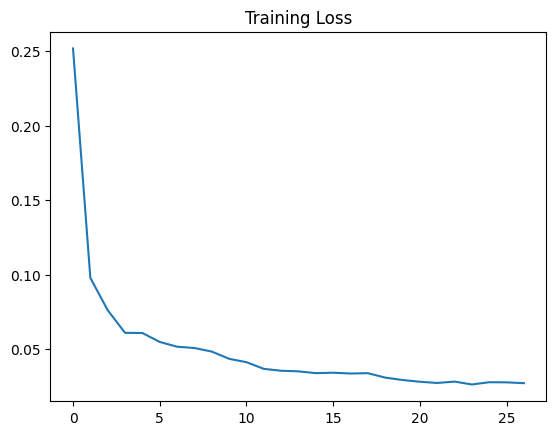

In [ ]:
plt.plot(losses)
plt.title("Training Loss")
plt.show()

In [ ]:
# Try saving?
torch.save(capsule_net.state_dict(),'model.pth')

In [ ]:
# Load the saved weights
capsule_net = CapsuleNetwork()
# move model to GPU, if available
if TRAIN_ON_GPU:
  # Since it was trained on GPU, it is mapped as such
  capsule_net.load_state_dict(torch.load('model.pth',weights_only = False))
else:
  capsule_net.load_state_dict(torch.load('model.pth',weights_only = False,map_location=torch.device('cpu')))
capsule_net.eval()

CapsuleNetwork(
  (conv_layer): ConvLayer(
    (conv): Conv2d(1, 256, kernel_size=(9, 9), stride=(1, 1))
  )
  (primary_capsules): PrimaryCaps(
    (capsules): ModuleList(
      (0-7): 8 x Conv2d(256, 32, kernel_size=(9, 9), stride=(2, 2))
    )
  )
  (digit_capsules): DigitCaps()
  (decoder): Decoder(
    (linear_layers): Sequential(
      (0): Linear(in_features=160, out_features=512, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=512, out_features=1024, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=1024, out_features=784, bias=True)
      (5): Sigmoid()
    )
  )
)

In [ ]:
def test(capsule_net, test_loader):
    '''Prints out test statistics for a given capsule net.
       param capsule_net: trained capsule network
       param test_loader: test dataloader
       return: returns last batch of test image data and corresponding reconstructions
       '''
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    test_loss = 0 # loss tracking

    capsule_net.eval() # eval mode

    for batch_i, (images, target) in enumerate(test_loader):
        target = torch.eye(10).index_select(dim=0, index=target)

        batch_size = images.size(0)

        if TRAIN_ON_GPU:
            images, target = images.cuda(), target.cuda()

        # forward pass: compute predicted outputs by passing inputs to the model
        caps_output, reconstructions, y = capsule_net(images)
        # calculate the loss
        loss = criterion(caps_output, target, images, reconstructions)
        # update average test loss
        test_loss += loss.item()
        # convert output probabilities to predicted class
        _, pred = torch.max(y.data.cpu(), 1)
        _, target_shape = torch.max(target.data.cpu(), 1)

        # compare predictions to true label
        correct = np.squeeze(pred.eq(target_shape.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target_shape.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # avg test loss
    avg_test_loss = test_loss/len(test_loader)
    print('Test Loss: {:.8f}\n'.format(avg_test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

    # return last batch of capsule vectors, images, reconstructions
    return caps_output, images, reconstructions

In [ ]:
# call test function and get reconstructed images
caps_output, images, reconstructions = test(capsule_net, test_loader)

Test Loss: 0.03409957

Test Accuracy of     0: 99% (977/980)
Test Accuracy of     1: 99% (1131/1135)
Test Accuracy of     2: 98% (1018/1032)
Test Accuracy of     3: 97% (989/1010)
Test Accuracy of     4: 98% (965/982)
Test Accuracy of     5: 98% (883/892)
Test Accuracy of     6: 98% (947/958)
Test Accuracy of     7: 99% (1023/1028)
Test Accuracy of     8: 99% (965/974)
Test Accuracy of     9: 98% (992/1009)

Test Accuracy (Overall): 98% (9890/10000)


In [ ]:
def display_images(images, reconstructions):
    '''Plot one row of original MNIST images and another row (below)
       of their reconstructions.'''
    # convert to numpy images
    images = images.data.cpu().numpy()
    reconstructions = reconstructions.view(-1, 1, 28, 28)
    reconstructions = reconstructions.data.cpu().numpy()

    # plot the first ten input images and then reconstructed images
    fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(26,5))

    # input images on top row, reconstructions on bottom
    for images, row in zip([images, reconstructions], axes):
        for img, ax in zip(images, row):
            ax.imshow(np.squeeze(img), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

In [ ]:
# display original and reconstructed images, in rows
display_images(images, reconstructions)


In [ ]:
# convert data to Tensor *and* perform random affine transformation
transform = transforms.Compose(
    [transforms.RandomAffine(degrees=30, translate=(0.1,0.1)),
     transforms.ToTensor()]
    )

# test dataset
transformed_test_data = datasets.MNIST(root='data', train=False,
                                       download=True, transform=transform)

# prepare data loader
transformed_test_loader = torch.utils.data.DataLoader(transformed_test_data,
                                                      batch_size=batch_size,
                                                      num_workers=num_workers)

In [ ]:
# obtain one batch of test images
dataiter = iter(transformed_test_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [ ]:
# call test function and get reconstructed images
_, images, reconstructions = test(capsule_net, transformed_test_loader)

In [ ]:
# original input images
display_images(images, reconstructions)

In [ ]:
def vector_analysis(capsule_net, x, select_idx=1):
    '''Generates perturbed iage reconstructions given some digit capsule outputs.
       param capsule_net: trained capsule network
       param x: a batch of digit capsule outputs
       param select_idx: selects which image in a batch to analyze, default = 1
       return: list of perturbed, reconstructed images
       '''

    classes = (x ** 2).sum(dim=-1) ** 0.5
    classes = F.softmax(classes, dim=-1)

    # find the capsule with the maximum vector length
    # here, vector length indicates the probability of a class' existence
    _, max_length_indices = classes.max(dim=1)

    # create a sparse class matrix
    sparse_matrix = torch.eye(10) # 10 is the number of classes
    if TRAIN_ON_GPU:
        sparse_matrix = sparse_matrix.cuda()
    # get the class scores from the "correct" capsule
    y = sparse_matrix.index_select(dim=0, index=max_length_indices.data)

    # create reconstructed pixels
    x = x * y[:, :, None]

    # flatten image into a vector shape (batch_size, vector_dim)
    flattened_x = x.view(x.size(0), -1)
    # select a single image from a batch to work with
    flattened_x = flattened_x[select_idx]

    # track reconstructed images
    reconstructed_ims = []
    # values to change *one* vector dimension by
    perturb_range = np.arange(-0.25, 0.30, 0.05)

    # iterate through 16 vector dims
    for k in range(16):
        # create a copy of flattened_x to modify
        transformed_x = torch.zeros(*flattened_x.size()).cuda()
        transformed_x[:] = flattened_x[:]
        # iterate through each perturbation value
        for j in range(len(perturb_range)):
            # for each capsule output
            for i in range(10):
                transformed_x[k+(16*i)] = flattened_x[k+(16*i)]+perturb_range[j]

            # create reconstructed images
            reconstructions = capsule_net.decoder.linear_layers(transformed_x)
            # reshape into 28x28 image, (batch_size, depth, x, y)
            reconstructions = reconstructions.view(-1, 1, 28, 28)
            reconstructed_ims.append(reconstructions)

    # return final list of reconstructed ims
    return reconstructed_ims

# CapsNet for Ranjana

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/ScannedDataset/final dataset/ranjana-dataset.zip" -d "RanjanaDataset"

Streaming output truncated to the last 5000 lines.
  inflating: RanjanaDataset/27/IMG_0114_032.jpg  
  inflating: RanjanaDataset/27/IMG_0117_011.jpg  
  inflating: RanjanaDataset/27/IMG_0118_030.jpg  
  inflating: RanjanaDataset/27/IMG_0120_028.jpg  
  inflating: RanjanaDataset/27/IMG_0122_028.jpg  
  inflating: RanjanaDataset/27/IMG_0124_028.jpg  
  inflating: RanjanaDataset/27/IMG_0126_028.jpg  
  inflating: RanjanaDataset/27/IMG_0128_031.jpg  
  inflating: RanjanaDataset/27/IMG_0130_028.jpg  
  inflating: RanjanaDataset/27/IMG_0133_003.jpg  
  inflating: RanjanaDataset/27/IMG_0138_029.jpg  
  inflating: RanjanaDataset/27/IMG_0148_030.jpg  
  inflating: RanjanaDataset/27/IMG_0150_030.jpg  
  inflating: RanjanaDataset/27/IMG_0152_030.jpg  
  inflating: RanjanaDataset/27/IMG_0164_030.jpg  
  inflating: RanjanaDataset/27/IMG_0166_028.jpg  
  inflating: RanjanaDataset/27/IMG_0168_029.jpg  
  inflating: RanjanaDataset/27/IMG_0170_028.jpg  
  inflating: RanjanaDataset/27/IMG_0172_028.jpg  

In [ ]:
# import resources
import numpy as np
import torch

# random seed (for reproducibility)
seed = 1
# set random seed for numpy
np.random.seed(seed)
# set random seed for pytorch
torch.manual_seed(seed)

In [ ]:
import torch
import zipfile
from torch import nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 62

# Data augmentation for training set
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.RandomRotation(10),  # Random rotation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation
    transforms.ToTensor()
])

# Transform for test set (no augmentation)
test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor()
])

# Load dataset from zip file path
root_dir = "/content/drive/MyDrive/ScannedDataset/final dataset/ranjana-dataset.zip"
extract_dir = '/content/ranjana_dataset/'

with zipfile.ZipFile(root_dir, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

dataset = datasets.ImageFolder(root=extract_dir, transform=train_transform)

# Split dataset into training and testing sets (80-20 split)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

# Apply different transforms to test set
test_data.dataset.transform = test_transform

# Create DataLoaders for train and test sets
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


In [ ]:
# Test
print(len(train_data),len(test_data))
print(len(train_loader),len(test_loader))
print(dataset.class_to_idx)

7192 1798
116 29
{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '52': 48, '53': 49, '54': 50, '55': 51, '56': 52, '57': 53, '58': 54, '59': 55, '6': 56, '60': 57, '61': 58, '7': 59, '8': 60, '9': 61}


Sample Training Labels: tensor([43, 33, 60, 25,  2, 60, 50, 10, 16, 28])


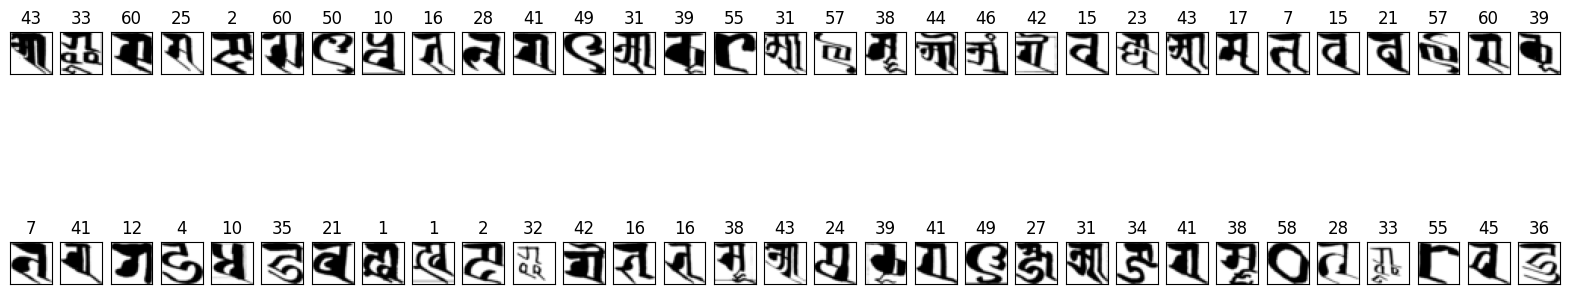

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()  # Convert to NumPy for visualization

# Print some labels from the batch
print("Sample Training Labels:", labels[:10])

# Plot images with labels
fig = plt.figure(figsize=(20, 5))
for idx in range(min(batch_size, len(images))):  # Avoid index errors if batch is smaller
    ax = fig.add_subplot(2, batch_size // 2, idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))
plt.show()
# obtain one batch of training images
# dataiter = iter(train_loader)
# images, labels = next(dataiter)
# images = images.numpy()

# print(labels)
# images, labels = next(dataiter)
# print(labels)

# # plot the images in the batch, along with the corresponding labels
# fig = plt.figure(figsize=(25, 4))
# for idx in np.arange(batch_size):
#     ax = fig.add_subplot(2, batch_size//2, idx+1, xticks=[], yticks=[])
#     ax.imshow(np.squeeze(images[idx]), cmap='gray')
#     # print out the correct label for each image
#     # .item() gets the value contained in a Tensor
#     ax.set_title(str(labels[idx].item()))

In [ ]:
from torch import nn
class ConvLayer(nn.Module):

    def __init__(self, in_channels=1, out_channels=256):
        '''Constructs the ConvLayer with a specified input and output size.
           param in_channels: input depth of an image, default value = 1
           param out_channels: output depth of the convolutional layer, default value = 256
           '''
        super(ConvLayer, self).__init__()

        # defining a convolutional layer of the specified size
        self.conv = nn.Conv2d(in_channels, out_channels,
                              kernel_size=9, stride=1, padding=0)

    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input to the layer; an input image
           return: a relu-activated, convolutional layer
           '''
        # applying a ReLu activation to the outputs of the conv layer
        features = F.relu(self.conv(x)) # will have dimensions (batch_size, 20, 20, 256)
        return features

class PrimaryCaps(nn.Module):

    def __init__(self, num_capsules=8, in_channels=256, out_channels=32):
        '''Constructs a list of convolutional layers to be used in
           creating capsule output vectors.
           param num_capsules: number of capsules to create
           param in_channels: input depth of features, default value = 256
           param out_channels: output depth of the convolutional layers, default value = 32
           '''
        super(PrimaryCaps, self).__init__()

        # creating a list of convolutional layers for each capsule I want to create
        # all capsules have a conv layer with the same parameters
        self.capsules = nn.ModuleList([
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                      kernel_size=9, stride=2, padding=0)
            for _ in range(num_capsules)])

    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input; features from a convolutional layer
           return: a set of normalized, capsule output vectors
           '''
        # get batch size of inputs
        batch_size = x.size(0)
        # reshape convolutional layer outputs to be (batch_size, vector_dim=1152, 1)
        u = [capsule(x).view(batch_size, 32 * 6 * 6, 1) for capsule in self.capsules]
        # stack up output vectors, u, one for each capsule
        u = torch.cat(u, dim=-1)
        # squashing the stack of vectors
        u_squash = self.squash(u)
        return u_squash

    def squash(self, input_tensor):
        '''Squashes an input Tensor so it has a magnitude between 0-1.
           param input_tensor: a stack of capsule inputs, s_j
           return: a stack of normalized, capsule output vectors, v_j
           '''
        squared_norm = (input_tensor ** 2).sum(dim=-1, keepdim=True)
        scale = squared_norm / (1 + squared_norm) # normalization coeff
        output_tensor = scale * input_tensor / torch.sqrt(squared_norm)
        return output_tensor


In [ ]:
#import helpers # to get transpose softmax function
import torch.nn.functional as F

# dynamic routing
def dynamic_routing(b_ij, u_hat, squash, routing_iterations=3):
    '''Performs dynamic routing between two capsule layers.
       param b_ij: initial log probabilities that capsule i should be coupled to capsule j
       param u_hat: input, weighted capsule vectors, W u
       param squash: given, normalizing squash function
       param routing_iterations: number of times to update coupling coefficients
       return: v_j, output capsule vectors
       '''
    # update b_ij, c_ij for number of routing iterations
    for iteration in range(routing_iterations):
        # softmax calculation of coupling coefficients, c_ij
        c_ij = F.softmax(b_ij, dim=2)

        # calculating total capsule inputs, s_j = sum(c_ij*u_hat)
        s_j = (c_ij * u_hat).sum(dim=2, keepdim=True)

        # squashing to get a normalized vector output, v_j
        v_j = squash(s_j)

        # if not on the last iteration, calculate agreement and new b_ij
        if iteration < routing_iterations - 1:
            # agreement
            a_ij = (u_hat * v_j).sum(dim=-1, keepdim=True)

            # new b_ij
            b_ij = b_ij + a_ij

    return v_j # return latest v_j

In [ ]:
# it will also be relevant, in this model, to see if I can train on gpu
TRAIN_ON_GPU = torch.cuda.is_available()

if(TRAIN_ON_GPU):
    print('Training on GPU!')
else:
    print('Only CPU available')

Training on GPU!


In [ ]:
class DigitCaps(nn.Module):

    def __init__(self, num_capsules=62, previous_layer_nodes=32*6*6,
                 in_channels=8, out_channels=16):
        '''Constructs an initial weight matrix, W, and sets class variables.
           param num_capsules: number of capsules to create
           param previous_layer_nodes: dimension of input capsule vector, default value = 1152
           param in_channels: number of capsules in previous layer, default value = 8
           param out_channels: dimensions of output capsule vector, default value = 16
           '''
        super(DigitCaps, self).__init__()

        # setting class variables
        self.num_capsules = num_capsules
        self.previous_layer_nodes = previous_layer_nodes # vector input (dim=1152)
        self.in_channels = in_channels # previous layer's number of capsules

        # starting out with a randomly initialized weight matrix, W
        # these will be the weights connecting the PrimaryCaps and DigitCaps layers
        self.W = nn.Parameter(torch.randn(num_capsules, previous_layer_nodes,
                                          in_channels, out_channels))

    def forward(self, u):
        '''Defines the feedforward behavior.
           param u: the input; vectors from the previous PrimaryCaps layer
           return: a set of normalized, capsule output vectors
           '''

        # adding batch_size dims and stacking all u vectors
        u = u[None, :, :, None, :]
        # 4D weight matrix
        W = self.W[:, None, :, :, :]

        # calculating u_hat = W*u
        u_hat = torch.matmul(u, W)

        # getting the correct size of b_ij
        # setting them all to 0, initially
        b_ij = torch.zeros(*u_hat.size())

        # moving b_ij to GPU, if available
        if TRAIN_ON_GPU:
            b_ij = b_ij.cuda()

        # update coupling coefficients and calculate v_j
        v_j = dynamic_routing(b_ij, u_hat, self.squash, routing_iterations=3)

        return v_j # return final vector outputs


    def squash(self, input_tensor):
        '''Squashes an input Tensor so it has a magnitude between 0-1.
           param input_tensor: a stack of capsule inputs, s_j
           return: a stack of normalized, capsule output vectors, v_j
           '''
        # same squash function as before
        squared_norm = (input_tensor ** 2).sum(dim=-1, keepdim=True)
        scale = squared_norm / (1 + squared_norm) # normalization coeff
        output_tensor = scale * input_tensor / torch.sqrt(squared_norm)
        return output_tensor

In [ ]:
class Decoder(nn.Module):

    def __init__(self, input_vector_length=16, input_capsules=62, hidden_dim=512):
        '''Constructs an series of linear layers + activations.
           param input_vector_length: dimension of input capsule vector, default value = 16
           param input_capsules: number of capsules in previous layer, default value = 10
           param hidden_dim: dimensions of hidden layers, default value = 512
           '''
        super(Decoder, self).__init__()

        # calculate input_dim
        input_dim = input_vector_length * input_capsules

        # define linear layers + activations
        self.linear_layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), # first hidden layer
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim, hidden_dim*2), # second, twice as deep
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim*2, 28*28), # can be reshaped into 28*28 image
            nn.Sigmoid() # sigmoid activation to get output pixel values in a range from 0-1
            )

    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input; vectors from the previous DigitCaps layer
           return: two things, reconstructed images and the class scores, y
           '''
        classes = (x ** 2).sum(dim=-1) ** 0.5
        classes = F.softmax(classes, dim=-1)

        # find the capsule with the maximum vector length
        # here, vector length indicates the probability of a class' existence
        _, max_length_indices = classes.max(dim=1)

        # create a sparse class matrix
        sparse_matrix = torch.eye(62) # 10 is the number of classes
        if TRAIN_ON_GPU:
            sparse_matrix = sparse_matrix.cuda()
        # get the class scores from the "correct" capsule
        y = sparse_matrix.index_select(dim=0, index=max_length_indices.data)

        # create reconstructed pixels
        x = x * y[:, :, None]
        # flatten image into a vector shape (batch_size, vector_dim)
        flattened_x = x.contiguous().view(x.size(0), -1)
        # create reconstructed image vectors
        reconstructions = self.linear_layers(flattened_x)

        # return reconstructions and the class scores, y
        return reconstructions, y

In [ ]:
class CapsuleNetwork(nn.Module):

    def __init__(self):
        '''Constructs a complete Capsule Network.'''
        super(CapsuleNetwork, self).__init__()
        self.conv_layer = ConvLayer()
        self.primary_capsules = PrimaryCaps()
        self.digit_capsules = DigitCaps()
        self.decoder = Decoder()

    def forward(self, images):
        '''Defines the feedforward behavior.
           param images: the original MNIST image input data
           return: output of DigitCaps layer, reconstructed images, class scores
           '''
        primary_caps_output = self.primary_capsules(self.conv_layer(images))
        caps_output = self.digit_capsules(primary_caps_output).squeeze().transpose(0,1)
        reconstructions, y = self.decoder(caps_output)
        return caps_output, reconstructions, y


In [ ]:
# instantiate and print net
capsule_net = CapsuleNetwork()

print(capsule_net)

# move model to GPU, if available
if TRAIN_ON_GPU:
    capsule_net = capsule_net.cuda()

CapsuleNetwork(
  (conv_layer): ConvLayer(
    (conv): Conv2d(1, 256, kernel_size=(9, 9), stride=(1, 1))
  )
  (primary_capsules): PrimaryCaps(
    (capsules): ModuleList(
      (0-7): 8 x Conv2d(256, 32, kernel_size=(9, 9), stride=(2, 2))
    )
  )
  (digit_capsules): DigitCaps()
  (decoder): Decoder(
    (linear_layers): Sequential(
      (0): Linear(in_features=992, out_features=512, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=512, out_features=1024, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=1024, out_features=784, bias=True)
      (5): Sigmoid()
    )
  )
)


In [ ]:
class CapsuleLoss(nn.Module):

    def __init__(self):
        '''Constructs a CapsuleLoss module.'''
        super(CapsuleLoss, self).__init__()
        self.reconstruction_loss = nn.MSELoss(reduction='sum') # cumulative loss, equiv to size_average=False

    def forward(self, x, labels, images, reconstructions):
        '''Defines how the loss compares inputs.
           param x: digit capsule outputs
           param labels:
           param images: the original MNIST image input data
           param reconstructions: reconstructed MNIST image data
           return: weighted margin and reconstruction loss, averaged over a batch
           '''
        batch_size = x.size(0)

        ##  calculate the margin loss   ##

        # get magnitude of digit capsule vectors, v_c
        v_c = torch.sqrt((x**2).sum(dim=2, keepdim=True))

        # calculate "correct" and incorrect loss
        left = F.relu(0.9 - v_c).view(batch_size, -1)
        right = F.relu(v_c - 0.1).view(batch_size, -1)

        # sum the losses, with a lambda = 0.5
        margin_loss = labels * left + 0.5 * (1. - labels) * right
        margin_loss = margin_loss.sum()

        ##  calculate the reconstruction loss   ##
        images = images.view(reconstructions.size()[0], -1)
        reconstruction_loss = self.reconstruction_loss(reconstructions, images)

        # return a weighted, summed loss, averaged over a batch size
        return (margin_loss + 0.0005 * reconstruction_loss) / images.size(0)

In [ ]:
import torch.optim as optim

# custom loss
criterion = CapsuleLoss()

# Adam optimizer with default params
optimizer = optim.Adam(capsule_net.parameters())

In [ ]:
def train(capsule_net, criterion, optimizer,
          n_epochs, print_every=300):
    '''Trains a capsule network and prints out training batch loss statistics.
       Saves model parameters if *validation* loss has decreased.
       param capsule_net: trained capsule network
       param criterion: capsule loss function
       param optimizer: optimizer for updating network weights
       param n_epochs: number of epochs to train for
       param print_every: batches to print and save training loss, default = 100
       return: list of recorded training losses
       '''

    # track training loss over time
    losses = []

    # one epoch = one pass over all training data
    for epoch in range(1, n_epochs+1):

        # initialize training loss
        train_loss = 0.0

        capsule_net.train() # set to train mode

        # get batches of training image data and targets
        for batch_i, (images, target) in enumerate(train_loader):

            # reshape and get target class
            target = torch.eye(62).index_select(dim=0, index=target)

            if TRAIN_ON_GPU:
                images, target = images.cuda(), target.cuda()

            # zero out gradients
            optimizer.zero_grad()
            # get model outputs
            caps_output, reconstructions, y = capsule_net(images)
            # calculate loss
            loss = criterion(caps_output, target, images, reconstructions)
            # perform backpropagation and optimization
            loss.backward()
            optimizer.step()

            train_loss += loss.item() # accumulated training loss

            # print and record training stats
            if batch_i != 0 and batch_i % print_every == 0:
                avg_train_loss = train_loss/print_every
                losses.append(avg_train_loss)
                print('Epoch: {} \tTraining Loss: {:.8f}'.format(epoch, avg_train_loss))
                train_loss = 0 # reset accumulated training loss

    return losses

In [ ]:
# training for 3 epochs
n_epochs = 15
losses = train(capsule_net, criterion, optimizer, n_epochs=n_epochs) # Lacks output visualization, bad UI to know if it is stuck or functioning as intended

In [ ]:
# save the model weights immediately after training
torch.save(capsule_net.state_dict(),'capsnet_ranjana_model.pth')

In [ ]:
# immediate checkpoint if you forget to save the weights locally
from google.colab import files
files.download('/content/capsnet_ranjana_model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def test(capsule_net, test_loader):
    '''Prints out test statistics for a given capsule net.
       param capsule_net: trained capsule network
       param test_loader: test dataloader
       return: returns last batch of test image data and corresponding reconstructions
       '''
    class_correct = list(0. for i in range(62))
    class_total = list(0. for i in range(62))

    test_loss = 0 # loss tracking

    capsule_net.eval() # eval mode

    for batch_i, (images, target) in enumerate(test_loader):
        target = torch.eye(62).index_select(dim=0, index=target)

        batch_size = images.size(0)

        if TRAIN_ON_GPU:
            images, target = images.cuda(), target.cuda()

        # forward pass: compute predicted outputs by passing inputs to the model
        caps_output, reconstructions, y = capsule_net(images)
        # calculate the loss
        loss = criterion(caps_output, target, images, reconstructions)
        # update average test loss
        test_loss += loss.item()
        # convert output probabilities to predicted class
        _, pred = torch.max(y.data.cpu(), 1)
        _, target_shape = torch.max(target.data.cpu(), 1)

        # compare predictions to true label
        correct = np.squeeze(pred.eq(target_shape.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target_shape.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # avg test loss
    avg_test_loss = test_loss/len(test_loader)
    print('Test Loss: {:.8f}\n'.format(avg_test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

    # return last batch of capsule vectors, images, reconstructions
    return caps_output, images, reconstructions

In [ ]:
# call test function and get reconstructed images
caps_output, images, reconstructions = test(capsule_net, test_loader)

Test Loss: 0.31929414

Test Accuracy of     0: 97% (38/39)
Test Accuracy of     1: 90% (19/21)
Test Accuracy of     2: 92% (23/25)
Test Accuracy of     3: 93% (30/32)
Test Accuracy of     4: 63% (14/22)
Test Accuracy of     5: 86% (26/30)
Test Accuracy of     6: 96% (28/29)
Test Accuracy of     7: 77% (27/35)
Test Accuracy of     8: 70% (21/30)
Test Accuracy of     9: 90% (30/33)

Test Accuracy (Overall): 87% (1578/1798)


In [ ]:
def display_images(images, reconstructions):
    '''Plot one row of original MNIST images and another row (below)
       of their reconstructions.'''
    # convert to numpy images
    images = images.data.cpu().numpy()
    reconstructions = reconstructions.view(-1, 1, 28, 28)
    reconstructions = reconstructions.data.cpu().numpy()

    # plot the first ten input images and then reconstructed images
    fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(26,5))

    # input images on top row, reconstructions on bottom
    for images, row in zip([images, reconstructions], axes):
        for img, ax in zip(images, row):
            ax.imshow(np.squeeze(img), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

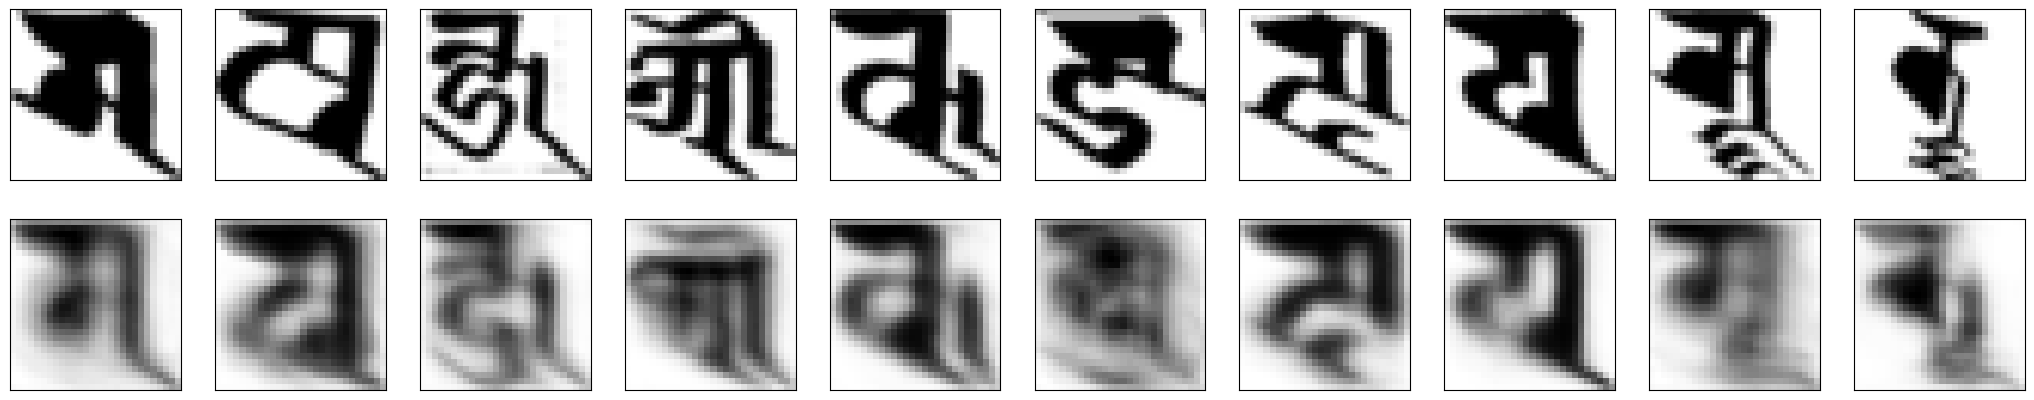

In [ ]:
# display original and reconstructed images, in rows
display_images(images, reconstructions)

In [ ]:
import torch
import numpy as np
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def test_single_image(capsule_net, image_path):
    '''Tests a single image and prints out the predicted class and reconstructed image.
       param capsule_net: trained capsule network
       param image_path: path to the image to be tested
       return: prints out test statistics and reconstructed image
    '''

    # Preprocess the input image
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Convert to grayscale if necessary
        transforms.Resize((28, 28)),  # Resize image to 28x28 for model input
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalize the image as done during training
    ])
    img = Image.open(image_path).convert('L')  # Open image in grayscale
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension (for a single image)
    img_tensor = img_tensor.to(device)  # Ensure the image tensor is on the correct device

    capsule_net.eval()  # Set model to evaluation mode

    # Forward pass: compute predicted outputs by passing inputs to the model
    with torch.no_grad():  # No gradients needed for inference
        caps_output, reconstructions, y = capsule_net(img_tensor)


        # Get the predicted class
        # Check if 'y' has more than one dimension
        if y.dim() > 1:
            predicted_class = torch.argmax(y, dim=1).item()
        else:
            predicted_class = torch.argmax(y).item()  # If not, use dim=0 (or no dim argument)


        # Get the predicted class
        predicted_class = torch.argmax(y, dim=1).item()  # Get class index with highest probability

        # Print predicted class
        print(f"Predicted Class Index: {predicted_class}")

        # Optionally, you can visualize the reconstructed image if needed
        reconstructed_img = reconstructions.view(28, 28).cpu().numpy()  # Convert tensor to numpy array
        print("Reconstructed Image:")

        # Visualize the reconstructed image
        plt.imshow(reconstructed_img, cmap='gray')
        plt.title(f"Predicted Class: {predicted_class}")
        plt.show()

    return predicted_class, reconstructions

# Usage example
model_path = "/content/capsnet_ranjana_model.pth"  # Change to your model path
model = CapsuleNetwork()  # Assuming CapsuleNetwork is defined
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)

image_path = "/content/drive/My Drive/Major Project/Preprocessed/gha.png"  # Change to your test image path
predicted_class, reconstructions = test_single_image(model, image_path)


<ipython-input-33-1d17aac56dd2>:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)